The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
torch.Size([100, 3, 100, 1])
torch.Size([100, 1, 100, 1])


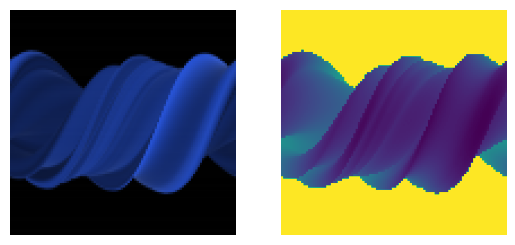

In [4]:

%load_ext autoreload
%autoreload 2

from pathlib import Path

import matplotlib.pyplot as plt
import torchvision.transforms.functional as TF
from einops import rearrange

from nerf2d_dataset import read_image_folder

ims, poses, focal, depths = read_image_folder(Path('../data/bunny/test'))

H, W = 200, 200

fig, axs = plt.subplots(1, 2)

ims_im = rearrange(ims, 'n c h 1 -> c h n')
ims_im = TF.resize(ims_im, (H, W), interpolation=TF.InterpolationMode.NEAREST_EXACT)

print(ims.shape)
print(depths.shape)

depths_im = rearrange(depths, 'n c h 1 -> c h n')
depths_im = TF.resize(depths_im, (H, W), interpolation=TF.InterpolationMode.NEAREST_EXACT)

axs[0].imshow(ims_im.permute(1, 2, 0))
axs[1].imshow(depths_im.permute(1, 2, 0))

for ax in axs:
    ax.axis('off')

